In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.DataFrame([[151,63],[174,81],[138,56],[186,91],[128,47],[136,57],[179,76],[163,72],[152,62],[131,48]])

In [6]:
df.columns = ['x', 'y']

In [7]:
df

,x,y
0,151,63
1,174,81
2,138,56
3,186,91
4,128,47
5,136,57
6,179,76
7,163,72
8,152,62
9,131,48


In [8]:
x_train = df['x'].values[:, np.newaxis]
y_train = df['y'].values

In [9]:
x_train.shape

(10, 1)

In [10]:
# Membuat model Linear Regression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [11]:
print('Coef : ', lm.coef_)
print('Intercept : ', lm.intercept_)

Coef :  [0.67461045]
Intercept :  -38.45508707607698


### y = ax + b
y = 0.67461045 * x -38.45508707607698

Berapakah berat seseorang jika tinggi adalah 170cm

In [20]:
bb = lm.coef_ * 160 + lm.intercept_
print('Berat : ', bb)

Berat :  [69.48258478]


In [16]:
bb1 = [[170], [183], [153], [168]]
pred = lm.predict(bb1)
print(pred)

[76.22868928 84.99862511 64.76031164 74.87946838]


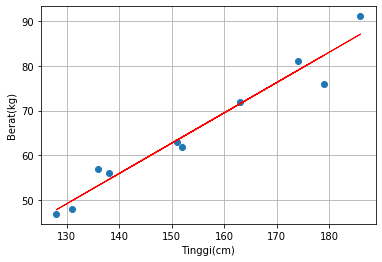

In [21]:
# Visualisasi
pb = lm.predict(x_train)
dfc = pd.DataFrame({'x': df['x'], 'y': pb})

plt.scatter(df['x'], df['y'])
plt.plot(dfc['x'], dfc['y'], color='red', linewidth=1)
plt.xlabel('Tinggi(cm)')
plt.ylabel('Berat(kg)')
plt.grid()
plt.show()

## Case: Prediksi Padi
Prediksi hasil panen padi berdasarkan data th 2009 - 2017 (Bantul)

In [35]:
df_padi = pd.read_csv('datapadi.csv', sep=';', names=['bulan','luas','curah_hujan','hama', 'hasil'], index_col='bulan')

In [36]:
df_padi

,luas,curah_hujan,hama,hasil
bulan,,,,
Bulan Tanam,Luas Panen (X1),Curah Hujan (X2),Hama (X3),Hasil Panen
Jan – Apr 2009,14210,Baik (10),10.70%,91862
Mei – Ags 2009,10863,Kurang (-20),12%,68244
Sep – Des 2009,3185,Kurang (-20),11.90%,22737
Jan – Apr 2010,12254,Baik (10),5.90%,81121
Mei – Ags 2010,11851,Kurang (-20),75%,63034
Sep – Des 2010,6621,Baik (10),14.50%,46201
Jan – Apr 2011,13388,Baik (10),7.50%,87552
Mei – Ags 2011,12708,Kurang (-20),23.70%,77131


In [34]:
df_padi.shape

(28, 4)

### Pre-processing

In [37]:
# Hapus header label
df_padi.drop(['Bulan Tanam'], inplace=True)

In [38]:
# Bersihkan data curah hujan
df_padi['curah_hujan'] = df_padi.curah_hujan.str.extract('(-?\d+)')

In [39]:
# Bersihkan data hama
df_padi['hama'] = df_padi.apply(lambda x:x['hama'][:-1], axis=1)

In [40]:
df_padi

,luas,curah_hujan,hama,hasil
bulan,,,,
Jan – Apr 2009,14210,10,10.7,91862
Mei – Ags 2009,10863,-20,12,68244
Sep – Des 2009,3185,-20,11.9,22737
Jan – Apr 2010,12254,10,5.9,81121
Mei – Ags 2010,11851,-20,75,63034
Sep – Des 2010,6621,10,14.5,46201
Jan – Apr 2011,13388,10,7.5,87552
Mei – Ags 2011,12708,-20,23.7,77131
Sep – Des 2011,4603,10,19.7,33321


In [42]:
df_padi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Jan – Apr 2009 to Sep – Des 2017
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   luas         27 non-null     object
 1   curah_hujan  27 non-null     object
 2   hama         27 non-null     object
 3   hasil        27 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [43]:
# Convert data type
df_padi['luas'] = df_padi.luas.astype(int)
df_padi['curah_hujan'] = df_padi.curah_hujan.astype(int)
df_padi['hama'] = df_padi.hama.astype(float)
df_padi['hasil'] = df_padi.hasil.astype(int)

In [44]:
df_padi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Jan – Apr 2009 to Sep – Des 2017
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   luas         27 non-null     int64  
 1   curah_hujan  27 non-null     int64  
 2   hama         27 non-null     float64
 3   hasil        27 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.1+ KB


### Visualisasi data

In [48]:
import seaborn as sns

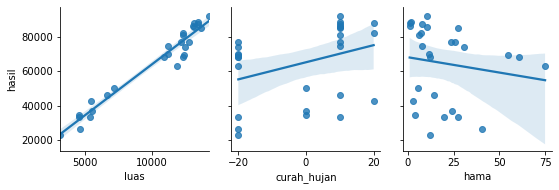

In [49]:
sns.pairplot(data=df_padi, x_vars=['luas','curah_hujan','hama'], y_vars='hasil', kind='reg')

In [50]:
df_padi.corr().style.background_gradient().set_precision(2)

,luas,curah_hujan,hama,hasil
luas,1.00,0.18,0.05,0.98
curah_hujan,0.18,1.00,-0.63,0.35
hama,0.05,-0.63,1.00,-0.15
hasil,0.98,0.35,-0.15,1.00


### Modelling

In [53]:
# Split data
# 27 data --> 21 data training, 6 data testing
train = df_padi[:21]
test = df_padi[21:]

In [54]:
print(train.shape)
print(test.shape)

(21, 4)
(6, 4)


In [55]:
X_train = train[['luas','curah_hujan','hama']]
y_train = train['hasil']

X_test = test[['luas','curah_hujan','hama']]
y_test = test['hasil']

In [56]:
# Membuat model linear regression
reg_padi = LinearRegression()
reg_padi.fit(X_train, y_train)

LinearRegression()

In [57]:
print(reg_padi.coef_)
print(reg_padi.intercept_)

[   5.929528    118.27991767 -175.71483753]
8306.792151921123


<pre>
    y = ax1 + bx2 + cx3 + d
    y = 5.929528*x1 + 118.27991767*x2 -175.71483753*x3 + 8306.792151921123
</pre>

In [58]:
pred_padi = reg_padi.predict(X_test)

In [60]:
pred_padi

array([76958.84119523, 69435.39416824, 36814.91817001, 88102.33809985,
       68125.91833895, 26367.40042722])

In [61]:
y_test

bulan
Jan – Apr 2016    76962
Mei – Ags 2016    69432
Sep – Des 2016    36812
Jan – Apr 2017    88102
Mei – Ags 2017    68126
Sep – Des 2017    26374
Name: hasil, dtype: int64

In [62]:
reg_padi.score(X_test, y_test)

0.9999999745476653

In [65]:
d2018 = [[15211, 0, 24.65], [15211, 20, 3.4]]
p2018 = reg_padi.predict(d2018)
print(p2018)

[ 94169.47177764 100269.01042858]


In [66]:
# Evaluasi RMSE
from sklearn import metrics

In [68]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test),pred_padi))
rmse

3.504508591002036

<pre>
Urutan melakukan prediksi:
1) Load dataset
2) Pre-processing data
3) Split data (training, testing)
4) Modelling
5) Evaluasi
</pre>

## Case: Prediksi harga rumah

In [69]:
df_rumah = pd.read_csv('harga_rumah.csv')

In [70]:
df_rumah.shape

(21613, 6)

In [75]:
df_rumah.head(10)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987
5,1225000.0,4,4.50,5420,11,2001
6,257500.0,3,2.25,1715,7,1995
7,291850.0,3,1.50,1060,7,1963
8,229500.0,3,1.00,1780,7,1960
9,323000.0,3,2.50,1890,7,2003


<pre>
Jono ingin membeli rumah dengan kriteria:
- Jumlah kamar = 3
- Jumlah kamar mandi = 2
- Luas rumah = 1800
- Grade = 7
- Tahun = 1995
</pre>

In [76]:
df_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


### Pre-processing

In [77]:
# Ubah tipe data bathrooms -> int
df_rumah['bathrooms'] = df_rumah.bathrooms.astype('int')

In [78]:
df_rumah.head(10)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987
5,1225000.0,4,4,5420,11,2001
6,257500.0,3,2,1715,7,1995
7,291850.0,3,1,1060,7,1963
8,229500.0,3,1,1780,7,1960
9,323000.0,3,2,1890,7,2003


In [79]:
# Cek apakah ada data kosong
df_rumah.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

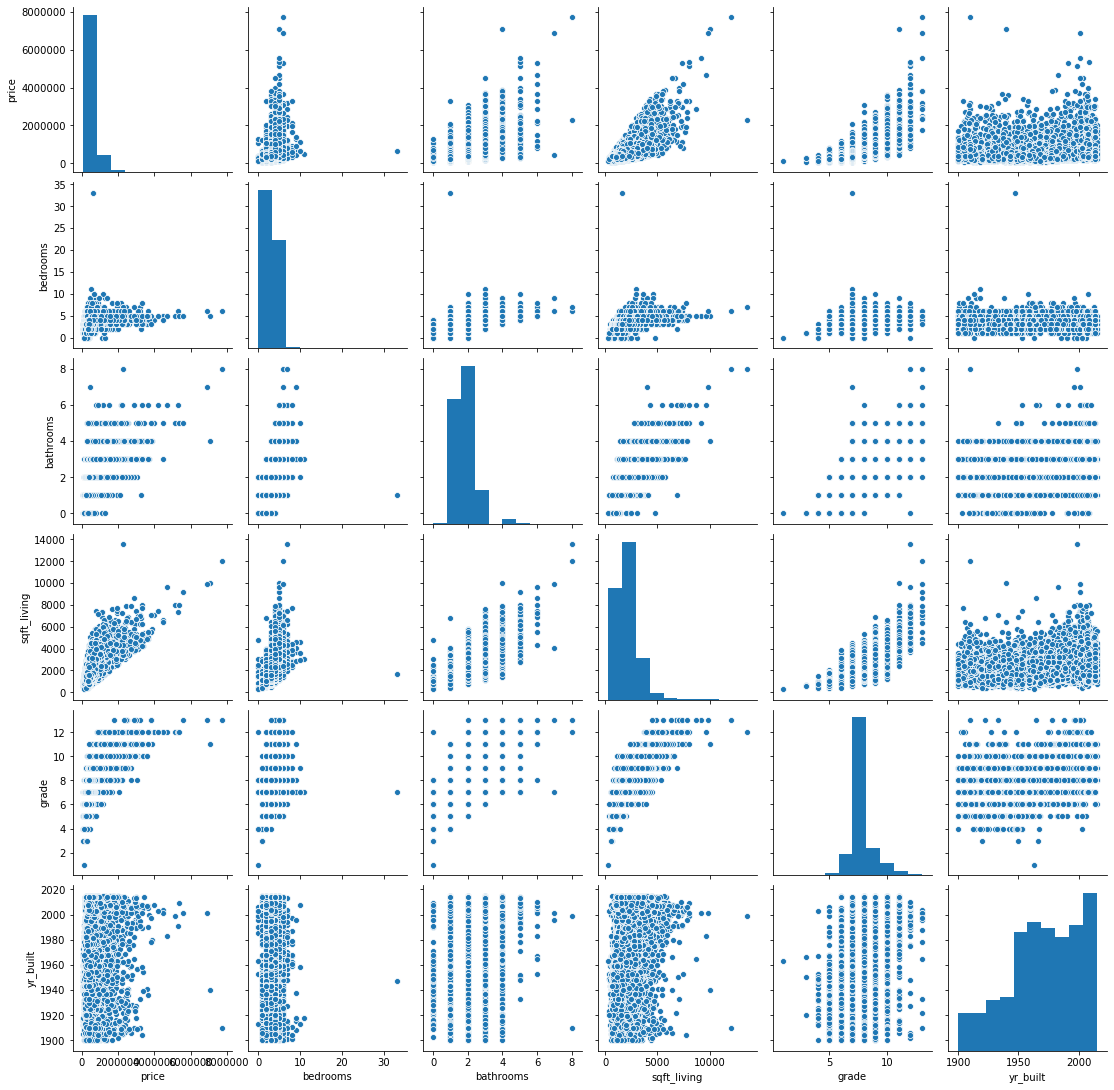

In [81]:
sns.pairplot(data=df_rumah)

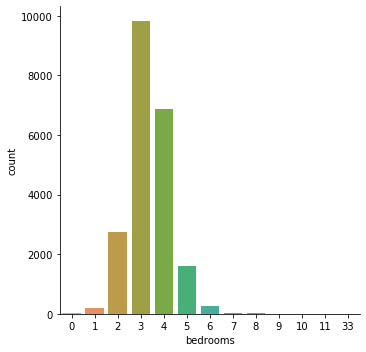

In [83]:
sns.catplot('bedrooms', data=df_rumah, kind='count')

In [84]:
df_rumah['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [85]:
df_rumah['bedrooms'] = df_rumah['bedrooms'].replace(33,3)

In [86]:
df_rumah['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [129]:
df_rumah.corr().style.background_gradient().set_precision(3)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.000,0.315,0.510,0.702,0.667,0.054
bedrooms,0.315,1.000,0.480,0.591,0.367,0.159
bathrooms,0.510,0.480,1.000,0.698,0.607,0.434
sqft_living,0.702,0.591,0.698,1.000,0.763,0.318
grade,0.667,0.367,0.607,0.763,1.000,0.447
yr_built,0.054,0.159,0.434,0.318,0.447,1.000


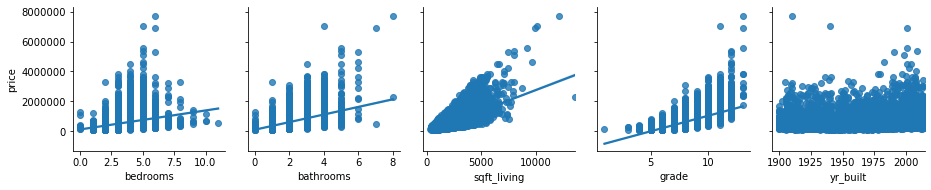

In [88]:
sns.pairplot(data=df_rumah, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars='price', kind='reg')

### Modelling

In [130]:
# features
X = df_rumah.drop(columns='price')
# target/label
y = df_rumah['price']

In [93]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
X_train.shape

(16209, 5)

In [121]:
X_test.shape

(5404, 5)

In [122]:
reg_rumah = LinearRegression()
reg_rumah.fit(X_train, y_train)

LinearRegression()

In [123]:
print(reg_rumah.coef_)
print(reg_rumah.intercept_)

[-51573.93286464  66894.82239502    185.5085022  128857.95885442
  -3978.35965276]
7065420.812556198


<pre>
    y = ax1 + bx2 + cx3 + dx4 + ex5 + f
</pre>

In [124]:
reg_rumah.score(X_test, y_test)

0.6152524996976388

In [125]:
jono = [[3,2,1800,7,1995]]
reg_rumah.predict(jono)

array([343582.16745248])